## The Data.

> House Sales in King County, USA Dataset.
> Here I used a dataset from kaggle. You can find it <a href='https://www.kaggle.com/harlfoxem/housesalesprediction'>here</a>

### Dataset Overview
> This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

### This is a list of features in out dataset
1. id : Unique notation for each house sold (primary key of the dataset)

2. date: Date house was sold

3. price: Price of the house (our prediction target)
4. bedrooms: Number of bedrooms
5. bathrooms: Number of bathrooms

6. sqft_living: Square footage of the home

7. sqft_lot: Square footage of the lot

8. floors :Total floors (levels) in house
9. waterfront :House which has a view to a waterfront
10. view: boolean feature (True (1) if the house has been viewed, False (0) if the house has not been viewed)
11. condition :How good the condition is overall

12. grade: overall grade given to the housing unit, based on King County grading system

13. sqft_above : Square footage of house apart from basement
14. sqft_basement: Square footage of the basement

15. yr_built : year the house was built

16. yr_renovated : Year when the house was renovated

17. zipcode: Zip code

18. lat: Latitude coordinate

19. long: Longitude coordinate

20. sqft_living15 : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

21. sqft_lot15 : LotSize area in 2015(implies-- some renovations)

## Importing libraries I'll need.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Reading the data.

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Exploratory Data Analysis and Data Visualization.

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#### Checking the shape of the data.

In [5]:
df_shape = df.shape

print("The shape of the data is :", df_shape)
print(f"The data has {df_shape[0]} rows")
print(f"The data has {df_shape[1]} columns")

The shape of the data is : (21597, 21)
The data has 21597 rows
The data has 21 columns


#### Checking if the data has any null values. and getting the sum of it.

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Making a heatmap for null values.

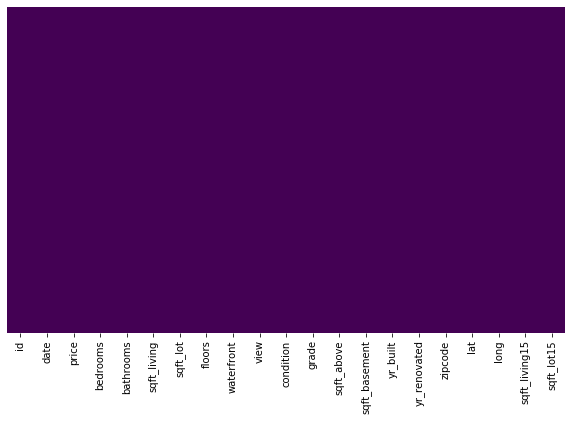

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### The data hasn't any null values.

### Helpful functions.
#### Here I'll make some helpful functions

In [8]:
base_color = sns.color_palette()[0]  # This is the base color that I'll use for all visualizations.


def create_hist(df, x):
    # Plotting
    plt.figure(figsize=(10, 6))  # Change the size of the visualization

    sns.distplot(df[x]);

# This function will create a scatter plot.
def create_scatter(df, x, y):
    # Plotting
    plt.figure(figsize=(10, 6))  # Change the size of the visualization
    
    sns.scatterplot(data=df, x=x, y=y)

# This function will create a countplot for categorical features.
def create_countplot(df, x, hue=None, order=True, rotation=False):
    col_order = None
    
    if order:
        col_order = df[x].value_counts().index  # Getting the order for the visualization.
    
    # Plotting
    plt.figure(figsize=(10, 6))  # Change the size of the visualization
    sns.countplot(data=df, x=x, hue=hue, order=col_order, color=base_color)
    
    if rotation:
        plt.xticks(rotation=15)
    
# This function will create a boxplot.
def create_boxplot(df, x, y): 
    # Plotting
    plt.figure(figsize=(10, 6))  # Change the size of the visualization
    
    sns.boxplot(data=df, x=x, y=y, color=base_color)

## Univariate Exploration.

### Creating a histograms for quantitative features.

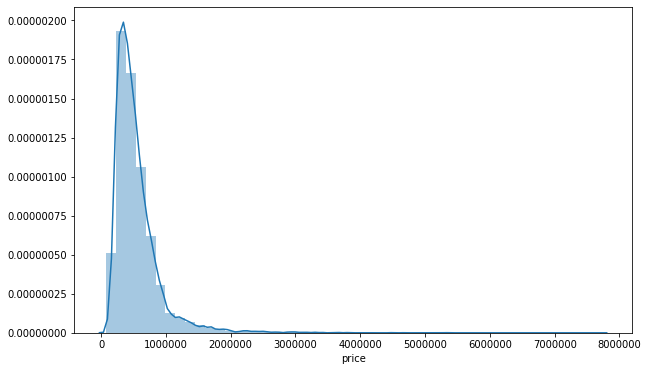

In [9]:
# Creating a histogram for the price column
create_hist(df=df, x='price')

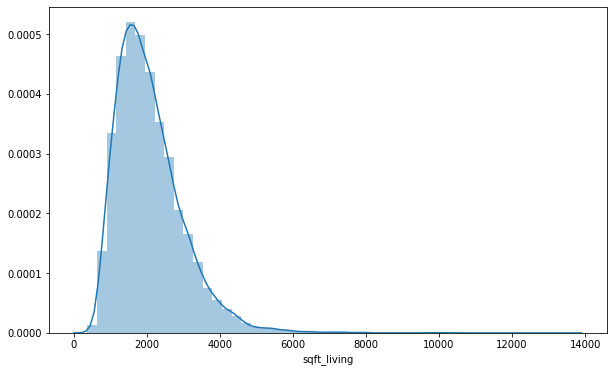

In [10]:
# Creating a histogram for the sqft_living column
create_hist(df=df, x='sqft_living')

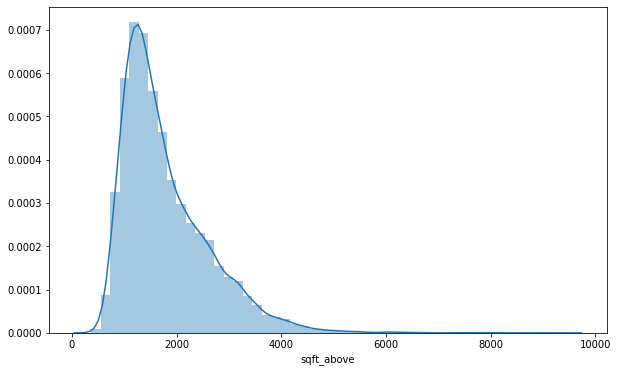

In [11]:
# Creating a histogram for the sqft_above column
create_hist(df=df, x='sqft_above')

### Creating a countplot for categorical features.

#### In this graph. it seems that the majority of the houses have (3 and 4) bedrooms. but there are also outliers because there are houses have 33 bedrooms.

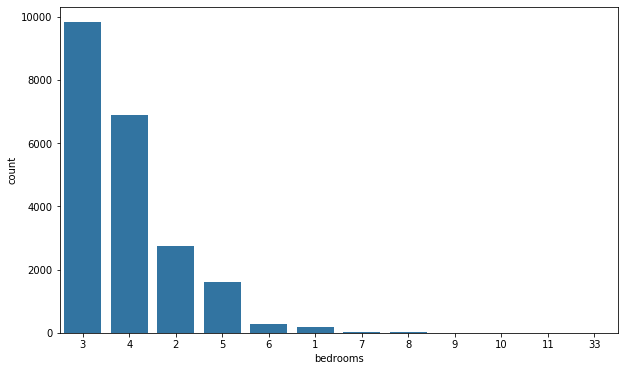

In [12]:
# Creating a countplot for the bedrooms column
create_countplot(df=df, x='bedrooms')

In [13]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

#### In bathrooms column I can see that there are one or two houses has a unique value.

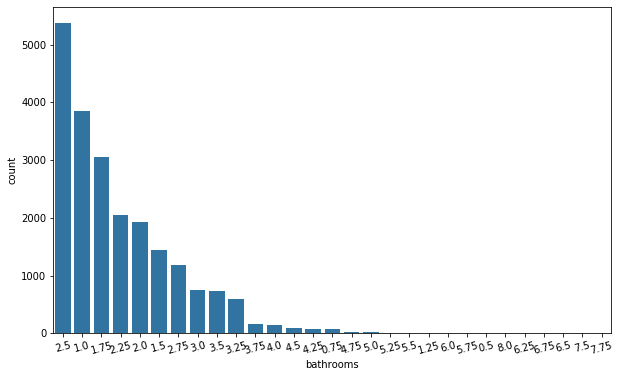

In [14]:
# Creating a countplot for the bathrooms column
create_countplot(df=df, x='bathrooms', rotation=True)

In [15]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

#### In this graph. Almost 99% of the waterfront column is 0. which means that 99% of houses don't  front of the water

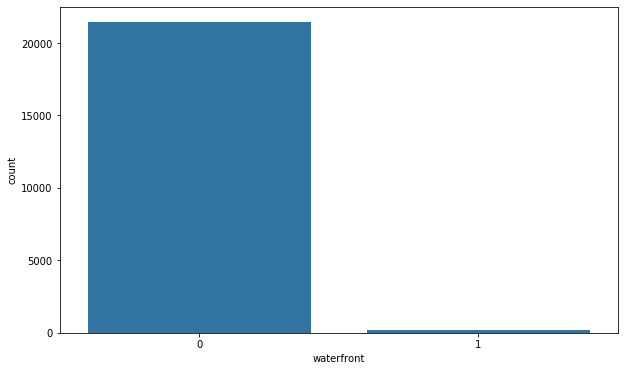

In [16]:
# Creating a countplot for the waterfront column
create_countplot(df=df, x='waterfront')

In [17]:
df['waterfront'].value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

#### In this graph. the majority of the houses in grades (7, 8, 9). There are a small numbers for (3, 4, 12, 14).

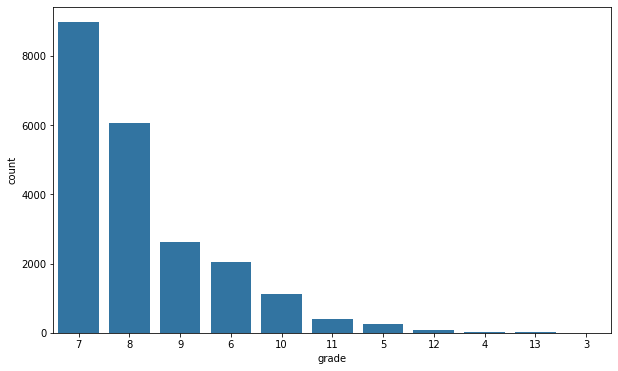

In [18]:
# Creating a countplot for the grade column
create_countplot(df=df, x='grade')

In [19]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

#### In this graph. the majority of the houses have view 0.

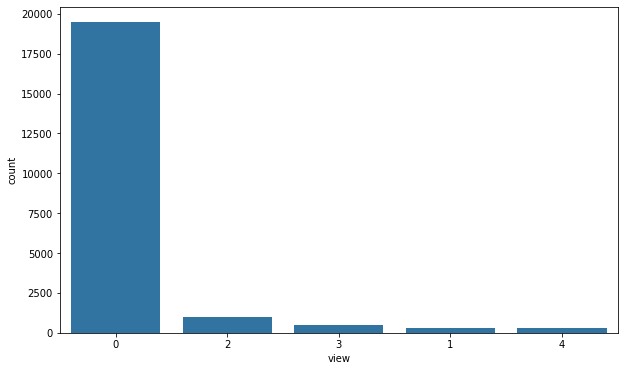

In [20]:
# Creating a countplot for the view column
create_countplot(df=df, x='view')

## Bivariate Exploration.

### Creating a scatterplots for (quantitative and  quantitative).

#### I can say that there is a good correlation between the price and sqft_living.

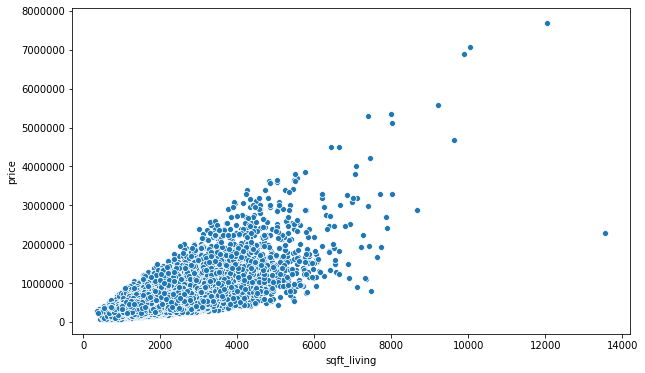

In [21]:
# Creating a scatterplot for the sqft_living and price columns.
create_scatter(df=df, x='sqft_living', y='price')

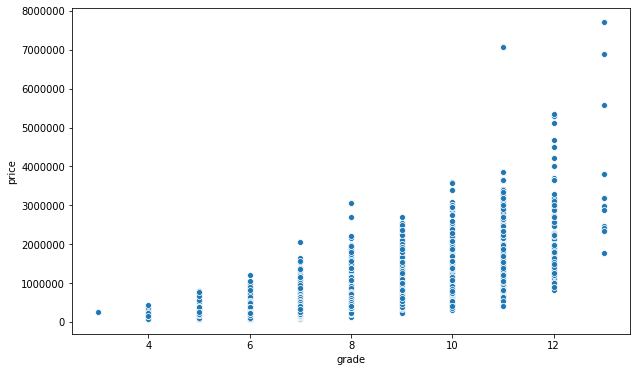

In [22]:
# Creating a scatterplot for the grade and price columns.
create_scatter(df=df, x='grade', y='price')

#### It seems that there is a good correlation between the price and sqft_living.

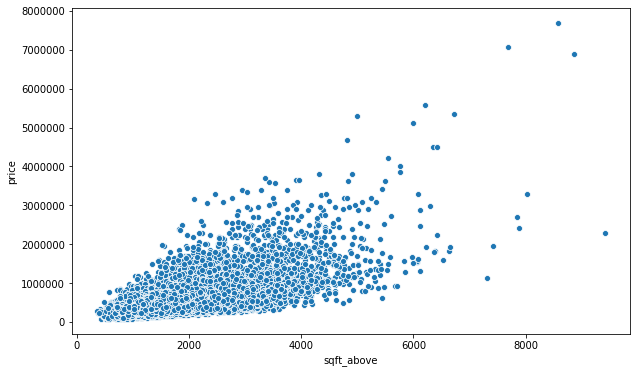

In [23]:
# Creating a scatterplot for the sqft_above and price columns.
create_scatter(df=df, x='sqft_above', y='price')

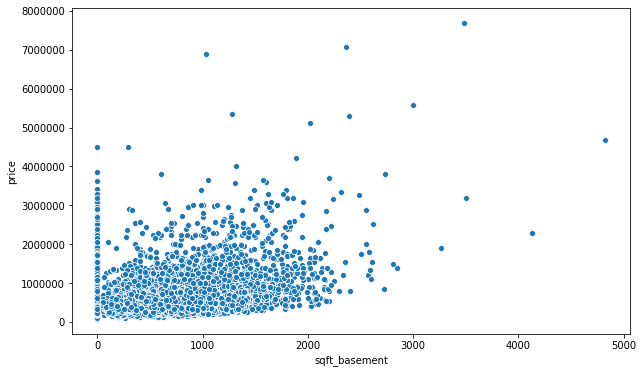

In [24]:
# Creating a scatterplot for the sqft_basement and price columns.
create_scatter(df=df, x='sqft_basement', y='price')

### Note:- I'll deal and visualize with the lat and long features in a better way down.

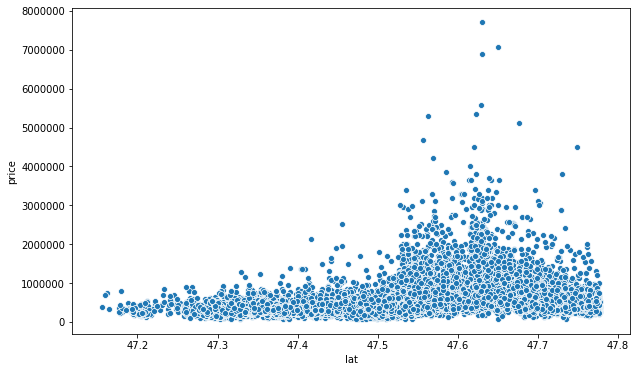

In [25]:
# Creating a scatterplot for the lat and price columns.
create_scatter(df=df, x='lat', y='price')

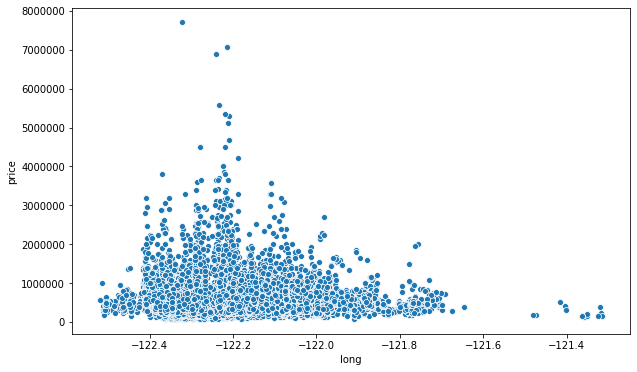

In [26]:
# Creating a scatterplot for the long and price columns.
create_scatter(df=df, x='long', y='price')

### Creating boxplots for (categorical and quantitative).

#### We can see that there are some outliers in bedrooms column.

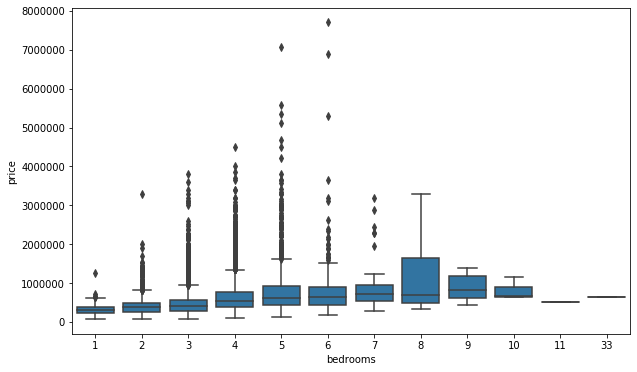

In [27]:
# Creating a boxplot for bedrooms and price columns.
create_boxplot(df=df, x='bedrooms', y='price')

## Question:- Is there a correlation between price and the number of bathrooms.

## Answering the Question:-

### Yes there is a good correlation between price and the number of bathrooms.

#### Also there are some outliers.

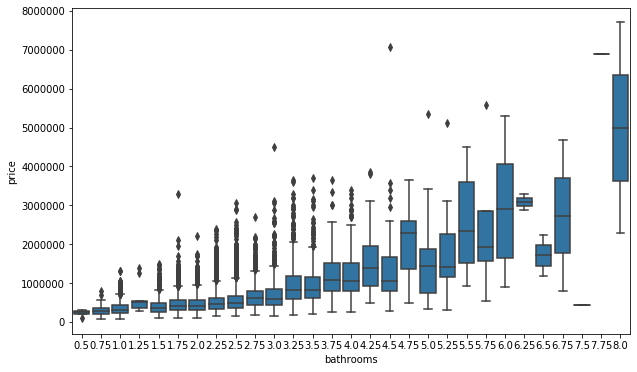

In [28]:
# Creating a boxplot for bedrooms and price columns.
create_boxplot(df=df, x='bathrooms', y='price')

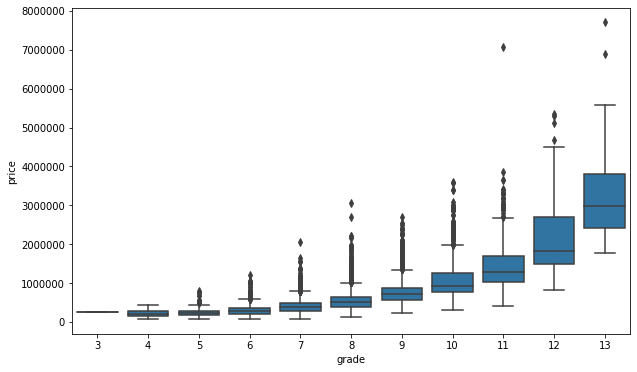

In [29]:
# Creating a boxplot for bedrooms and price columns.
create_boxplot(df=df, x='grade', y='price')

## Question: - Does the house price affect whether or not it is in front of the water?

## Answering the Question:-
### Yes the houses which are in front of the water have high price.

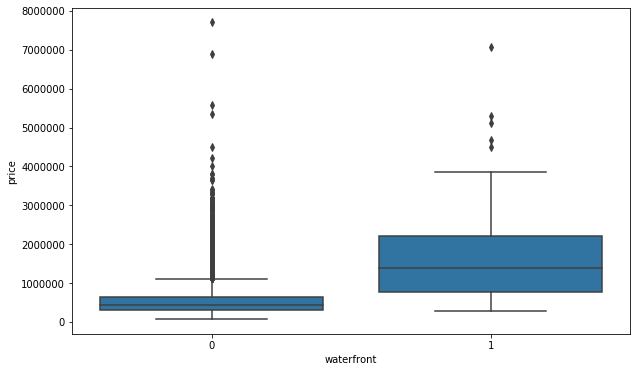

In [30]:
# Creating a boxplot for bedrooms and price columns.
create_boxplot(df=df, x='waterfront', y='price')

### Some Summaries from the boxplots.

1. We can see that there are some outliers in the data.
2. There is a good correlation between price and bathrooms.
3. There is a good correlation between price and grade.
4. The houses which front of the water have a higher price.

### Geting the correlation between features and the label (price)

In [31]:
# Printing the correlation between features and price after sorting them.
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

### Visualizing the correlation.

#### First let's create a heatmap for the correlation between all features.
#### By looking for this heatmap. I can say that this graph is bad. You literally can't understand anything from this graph. So I'll visualize the correlation in a better way.

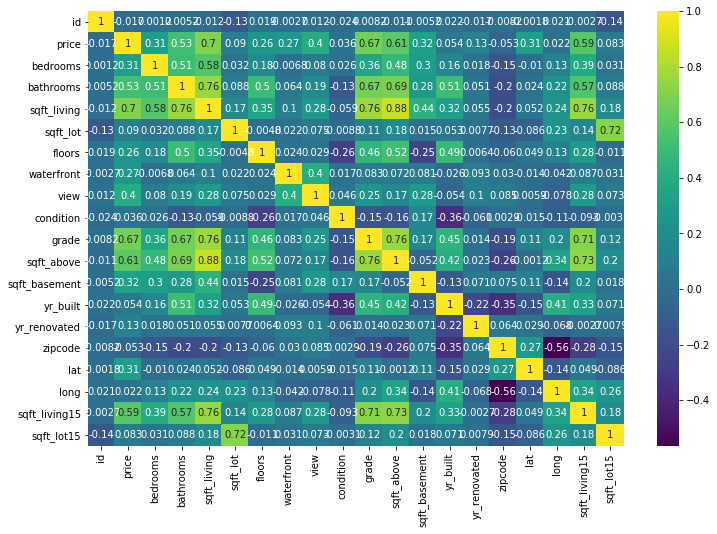

In [32]:
plt.figure(figsize=(12, 8))

sns.heatmap(df.corr(), annot=True, cmap='viridis')

#### Here I'll visualize the correlation in a better way.
#### There is a good correlation between features and price.

Text(0, 0.5, 'Price')

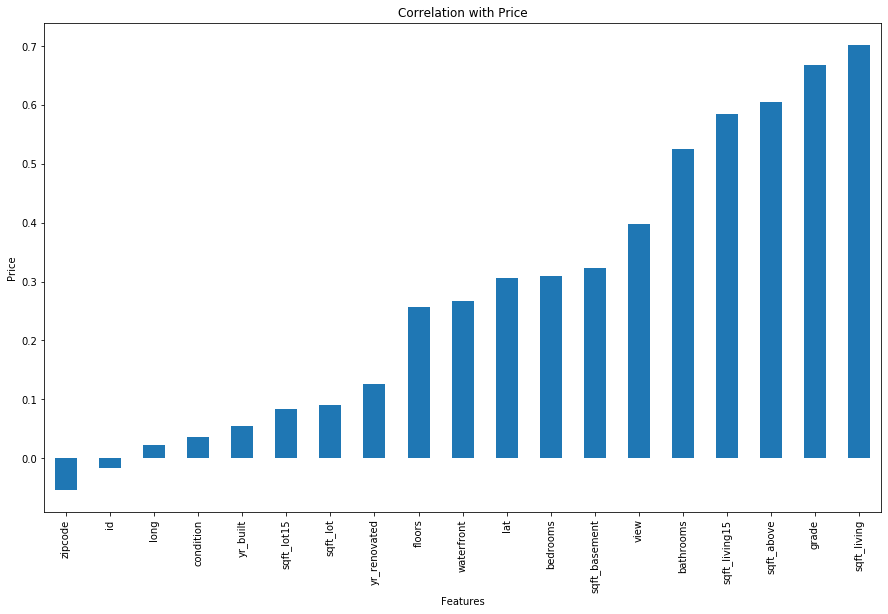

In [33]:
# Here I got the correlation between all features and the price then I sorted the features.
# I dropped the last one because the last one is the price it self.
# Finally I plotted it with bar chart and I changed the size of the plot.
df.corr()['price'].sort_values()[:-1].plot(kind='bar', figsize=(15, 9))

plt.title('Correlation with Price')
plt.xlabel('Features')
plt.ylabel('Price')

## Multivariate Exploration

## Question: - Are there places where house prices are higher than in other places?

### To answer this question, it will need some work.

### Geographical Properties.

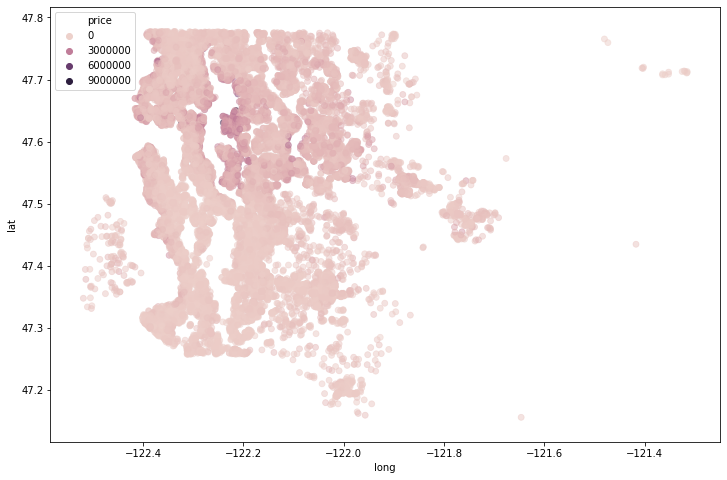

In [34]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', data=df, hue='price',
                alpha=0.5, edgecolor=None)

### Getting the top highest 20 houses.

In [35]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


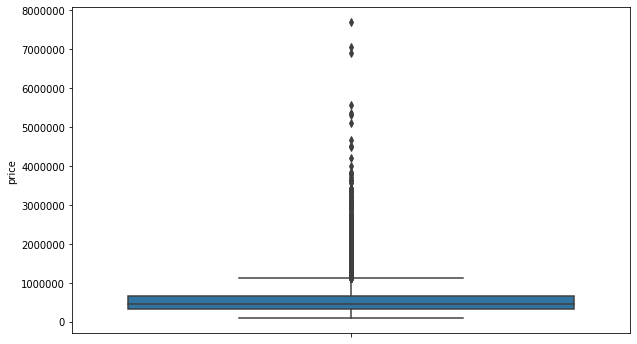

In [36]:
create_boxplot(df=df, x=None, y='price')

### Some summaries from this part.

1. this visualize should show us the map of King County, USA. and the places that the price is high in there should have a different color. 
2. But it seems that it doesn't show that. Because there are outliers in the data (the price of one house is 7 million) So I'll drop these outliers from this visualization.

#### Getting the length of 2% from the data.

In [37]:
len(df) * 0.02

431.94

### Now I'll deal with these outliers.

### Creating a new variable which has 98% from the data.

In [38]:
without_2_percent = df.sort_values('price', ascending=False).iloc[432:]

### Repeating the visualization and see what happen.
#### Now the map is so clear and we can easily know what are the places that have the highest prices (The darker one).

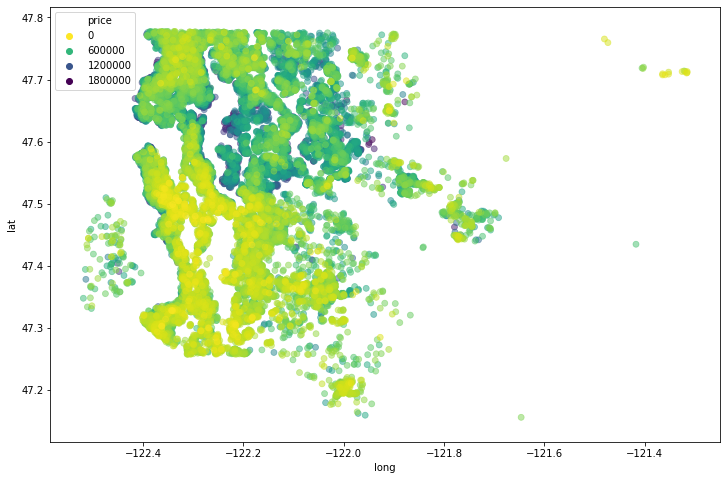

In [39]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', data=without_2_percent,
               hue='price', alpha=0.5, edgecolor=None, palette='viridis_r')

## Answering the Question:-
### Yes there are places have high prices than others. We can see that from the plot.

### What I did here.

1. I dropped 2% of the data which is the outliers. Then I repeat plotting the map.
2. The map is now clear and we can see the places which have a higher price.

## Some Feature Engineering.

In [40]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Question: - Has the price of houses increased over the years or decreased?

#### To answer this question, it will need some work.

### I have date feature but its type is object (string) and I can't use this type building the model so I'll create new columns that have data from this column with type I can use building the model.

In [41]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

#### Converting the object type to datetime64 type to the date column.

In [42]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

#### Creating two new columns that will have the year and the month from the date column.

In [43]:
df['year'] = df['date'].apply(lambda df: df.year)
df['month'] = df['date'].apply(lambda df: df.month)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


## Answering the Question:-

#### We can see that the prices have increased over the years.

#### Visualizing the correlation between the year column and the price.

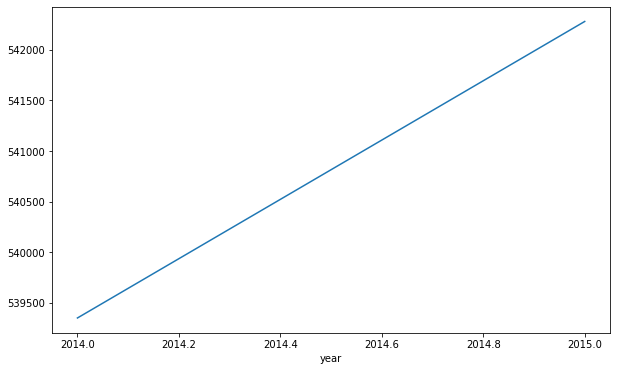

In [44]:
df.groupby('year')['price'].mean().plot(figsize=(10, 6))

#### Visualizing the correlation between the month column and the price.

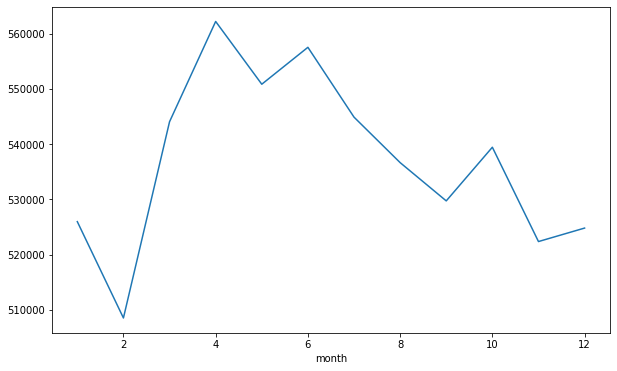

In [45]:
df.groupby('month')['price'].mean().plot(figsize=(10, 6))

## Conclusion

1. In categorical columns, There is some unique values which means that in the whole dataset there is one house has a value and there isn't any other house has this value.
2. There are some outliers in categorical columns.
3. There are a good correlations between price and other features.
4. There is a good correlation between price and bathrooms.
5. There is a good correlation between price and grade.
6. The houses which in front of the water have a higher price.
7. The prices have increased over the years.
8. There are places have high prices than others.

### Dropping the columns I'll not use.

In [46]:
columns_no_need = ['id', 'date', 'zipcode']

df.drop(columns_no_need, axis=1, inplace=True)

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


## Setting the features to X variable and the label to y variable.

In [47]:
X = df.drop('price', axis=1).values
y = df['price'].values

## Splitting the data into a training set and testing set.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Scaling the data using StandardScaler.

In [49]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### The data has 19 feature so the first layer in the neuron network will have 19 neurons.

In [50]:
X_train.shape

(15117, 19)

In [51]:
X_test.shape

(6480, 19)

## Creating the Model.

In [52]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

## Fitting the Model.

In [53]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test),
         batch_size=128, verbose=1, epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 2s 130us/sample - loss: 429751766089.2251 - val_loss: 420128215758.0642
Epoch 2/400
15117/15117 [==============================] - 0s 12us/sample - loss: 429557527297.7781 - val_loss: 419537153613.1161
Epoch 3/400
15117/15117 [==============================] - 0s 12us/sample - loss: 427527841575.1019 - val_loss: 415341211051.2988
Epoch 4/400
15117/15117 [==============================] - 0s 12us/sample - loss: 418868300962.0978 - val_loss: 401686516430.0642
Epoch 5/400
15117/15117 [==============================] - 0s 12us/sample - loss: 397232818281.5363 - val_loss: 372612347160.6519
Epoch 6/400
15117/15117 [==============================] - 0s 12us/sample - loss: 357629458434.8450 - val_loss: 325117233248.0790
Epoch 7/400
15117/15117 [==============================] - 0s 12us/sample - loss: 299749916007.6227 - val_loss: 262143784540.2864
Epoch 8/400
15117/15117 [===============

15117/15117 [==============================] - 0s 13us/sample - loss: 35912303305.9618 - val_loss: 38407549024.0790
Epoch 65/400
15117/15117 [==============================] - 0s 12us/sample - loss: 35788705960.2620 - val_loss: 38314898055.2691
Epoch 66/400
15117/15117 [==============================] - 0s 11us/sample - loss: 35697124812.5528 - val_loss: 38234877547.4568
Epoch 67/400
15117/15117 [==============================] - 0s 11us/sample - loss: 35591849243.3493 - val_loss: 38138512573.6296
Epoch 68/400
15117/15117 [==============================] - 0s 11us/sample - loss: 35499807241.7205 - val_loss: 38056638544.9086
Epoch 69/400
15117/15117 [==============================] - 0s 11us/sample - loss: 35404246283.0921 - val_loss: 37975326603.6938
Epoch 70/400
15117/15117 [==============================] - 0s 11us/sample - loss: 35298192715.4435 - val_loss: 37926863646.9728
Epoch 71/400
15117/15117 [==============================] - 0s 11us/sample - loss: 35240082542.6167 - val_loss

15117/15117 [==============================] - 0s 12us/sample - loss: 32136425828.8454 - val_loss: 34818678096.2765
Epoch 128/400
15117/15117 [==============================] - 0s 11us/sample - loss: 32120320024.5213 - val_loss: 34783941214.8148
Epoch 129/400
15117/15117 [==============================] - 0s 12us/sample - loss: 32101481654.4193 - val_loss: 34778170906.5481
Epoch 130/400
15117/15117 [==============================] - 0s 12us/sample - loss: 32064087285.0095 - val_loss: 34721182631.5062
Epoch 131/400
15117/15117 [==============================] - 0s 11us/sample - loss: 32049620845.3466 - val_loss: 34698315290.5481
Epoch 132/400
15117/15117 [==============================] - 0s 12us/sample - loss: 32022413255.0998 - val_loss: 34661295849.8765
Epoch 133/400
15117/15117 [==============================] - 0s 14us/sample - loss: 31986139624.9351 - val_loss: 34632502805.4914
Epoch 134/400
15117/15117 [==============================] - 0s 11us/sample - loss: 31966194048.0762 - v

15117/15117 [==============================] - 0s 13us/sample - loss: 30783499800.8261 - val_loss: 33323695652.6617
Epoch 191/400
15117/15117 [==============================] - 0s 15us/sample - loss: 30776586124.3030 - val_loss: 33299217835.2988
Epoch 192/400
15117/15117 [==============================] - 0s 11us/sample - loss: 30750174934.4934 - val_loss: 33291446256.8296
Epoch 193/400
15117/15117 [==============================] - 0s 12us/sample - loss: 30747319360.4191 - val_loss: 33271054770.8839
Epoch 194/400
15117/15117 [==============================] - 0s 12us/sample - loss: 30736464889.5649 - val_loss: 33248100023.3086
Epoch 195/400
15117/15117 [==============================] - 0s 12us/sample - loss: 30708448083.2673 - val_loss: 33234591202.9235
Epoch 196/400
15117/15117 [==============================] - 0s 12us/sample - loss: 30700830071.3041 - val_loss: 33212219745.9753
Epoch 197/400
15117/15117 [==============================] - 0s 12us/sample - loss: 30664500155.1101 - v

15117/15117 [==============================] - 0s 12us/sample - loss: 29823631365.9610 - val_loss: 32314413758.8938
Epoch 254/400
15117/15117 [==============================] - 0s 11us/sample - loss: 29830353549.3699 - val_loss: 32274994229.0963
Epoch 255/400
15117/15117 [==============================] - 0s 13us/sample - loss: 29816923196.3548 - val_loss: 32267888326.4790
Epoch 256/400
15117/15117 [==============================] - 0s 13us/sample - loss: 29810680254.3277 - val_loss: 32254374798.2222
Epoch 257/400
15117/15117 [==============================] - 0s 14us/sample - loss: 29774756235.4732 - val_loss: 32246417605.2148
Epoch 258/400
15117/15117 [==============================] - 0s 13us/sample - loss: 29755919740.4861 - val_loss: 32227165201.6988
Epoch 259/400
15117/15117 [==============================] - 0s 12us/sample - loss: 29752172930.6503 - val_loss: 32234148790.6765
Epoch 260/400
15117/15117 [==============================] - 0s 12us/sample - loss: 29758528006.2997 - v

15117/15117 [==============================] - 0s 11us/sample - loss: 28997595116.0849 - val_loss: 31489607583.9210
Epoch 317/400
15117/15117 [==============================] - 0s 11us/sample - loss: 28980836735.2633 - val_loss: 31478104792.1778
Epoch 318/400
15117/15117 [==============================] - 0s 11us/sample - loss: 28973430420.5162 - val_loss: 31461844455.9802
Epoch 319/400
15117/15117 [==============================] - 0s 11us/sample - loss: 28972021920.5398 - val_loss: 31462756690.8049
Epoch 320/400
15117/15117 [==============================] - 0s 11us/sample - loss: 28944549135.2919 - val_loss: 31452946148.8198
Epoch 321/400
15117/15117 [==============================] - 0s 11us/sample - loss: 28947351037.8662 - val_loss: 31455820458.6667
Epoch 322/400
15117/15117 [==============================] - 0s 11us/sample - loss: 28933202839.5475 - val_loss: 31440351722.5086
Epoch 323/400
15117/15117 [==============================] - 0s 11us/sample - loss: 28914359444.4824 - v

15117/15117 [==============================] - 0s 12us/sample - loss: 28263859777.4691 - val_loss: 30812907393.5802
Epoch 380/400
15117/15117 [==============================] - 0s 11us/sample - loss: 28244552881.1695 - val_loss: 30809522924.4049
Epoch 381/400
15117/15117 [==============================] - 0s 13us/sample - loss: 28231812979.1043 - val_loss: 30801931767.1506
Epoch 382/400
15117/15117 [==============================] - 0s 11us/sample - loss: 28213369512.7700 - val_loss: 30784251443.8321
Epoch 383/400
15117/15117 [==============================] - 0s 11us/sample - loss: 28214506168.4175 - val_loss: 30779374296.1778
Epoch 384/400
15117/15117 [==============================] - 0s 11us/sample - loss: 28197357535.8920 - val_loss: 30774642399.7630
Epoch 385/400
15117/15117 [==============================] - 0s 11us/sample - loss: 28200217252.1638 - val_loss: 30760242633.6395
Epoch 386/400
15117/15117 [==============================] - 0s 12us/sample - loss: 28165987110.8649 - v

### Visualizing the loss for the training and testing sets.

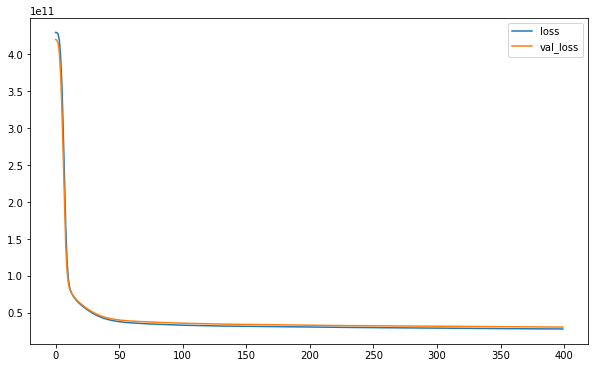

In [54]:
losses = pd.DataFrame(model.history.history)

losses.plot(figsize=(10, 6))

## Getting the prediction.

In [55]:
prediction = model.predict(X_test)

## Evaluation on Test Data.

In [56]:
mean_absolute_error(y_test, prediction)

104440.20542293596

In [57]:
np.sqrt(mean_squared_error(y_test, prediction))

175005.0966773314

In [59]:
df['price'].mean()

540296.5735055795

In [60]:
df['price'].median()

450000.0

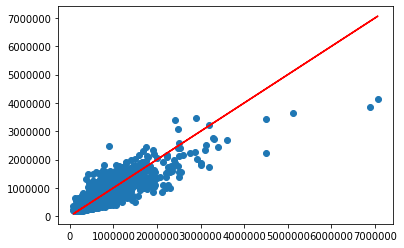

In [62]:
# Our predictions.
plt.scatter(y_test, prediction)

# Perfect predictions.
plt.plot(y_test, y_test, 'red')